## Your first inner join
You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the taxi_owners and taxi_veh tables together on the vid column. You can then use the merged table along with the **.value_counts()** method to find the most common **fuel_type**.

Since you'll be working with pandas throughout the course, the package will be preloaded for you as pd in each exercise in this course. Also the **taxi_owners** and **taxi_veh** DataFrames are loaded for you.

### Instructions

- Merge taxi_owners with **taxi_veh** on the column vid, and save the result to **taxi_own_veh**.

- Set the left and right table suffixes for overlapping columns of the merge to **_own** and **_veh**, respectively.

- Select the **fuel_type** column from **taxi_own_veh** and print the **value_counts()** to find the most popular **fuel_types** used.

In [1]:
import pandas as pd
taxi_owners = pd.read_pickle('taxi_owners.p')
taxi_veh = pd.read_pickle('taxi_vehicles.p')

In [2]:
taxi_own_veh = taxi_owners.merge(taxi_veh, on="vid", suffixes=('_own', '_veh'))

print(taxi_own_veh['fuel_type'].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


## Inner joins and number of rows returned
All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the wards and census tables, then comparing it to merges of copies of these tables that are slightly altered, named **wards_altered**, and **census_altered**. The first row of the **wards** column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.

For this exercise, it is important to know that the **wards** and **census** tables start with 50 rows.

### Instructions
- Merge wards and census on the **ward** column and save the result to **wards_census**.

- Merge the **wards_altered** and census tables on the **ward** column, and notice the difference in returned rows.

In [3]:
wards = pd.read_pickle('ward.p')
census = pd.read_pickle('census.p')
wards_altered = pd.read_csv('wards_altered.csv')
wards_altered["ward"] = wards_altered["ward"].astype('object')
wards_altered["zip"] = wards_altered["zip"].astype('object')
print(census.dtypes)
print(wards_altered.dtypes)


ward        object
pop_2000     int64
pop_2010     int64
change      object
address     object
zip         object
dtype: object
ward        object
alderman    object
address     object
zip         object
dtype: object


In [4]:
wards_census = wards.merge(census, on='ward')
print(wards_census.shape)

(50, 9)


In [5]:
# Print the first few rows of the wards_altered table to view the change 
print(wards_altered[['ward']].head())

# Merge the wards_altered and census tables on the ward column
wards_altered_census = wards_altered.merge(census, on='ward')

# Print the shape of wards_altered_census
print('wards_altered_census table shape:', wards_altered_census.shape)

  ward
0   61
1    2
2    3
3    4
4    5
wards_altered_census table shape: (0, 9)


## One-to-many merge
A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called **biz_owners**, to the **licenses** table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

The **licenses** and **biz_owners** DataFrames are loaded for you.

### Instructions

- Starting with the **licenses** table on the left, merge it to the **biz_owners** table on the column **account**, and save the results to a variable named **licenses_owners**.
- Group **licenses_owners** by **title** and count the number of accounts for each title. Save the result as **counted_df**
- Sort **counted_df** by the number of **accounts** in **descending** order, and save this as a variable named **sorted_df**.
- Use the **.head()** method to print the first few rows of the **sorted_df**.

In [6]:
biz_owners = pd.read_pickle('business_owners.p')
licenses = pd.read_pickle('licenses.p')

In [7]:
licenses_owners = licenses.merge(biz_owners, on="account")

counted_df = licenses_owners.groupby("title")["account"].count()

sortred_df = counted_df.sort_values(ascending=False)

print(counted_df.head())

#is not a dataframe, looks like an array of


title
ASST. SECRETARY       111
BENEFICIARY             4
CEO                   110
DIRECTOR              146
EXECUTIVE DIRECTOR     10
Name: account, dtype: int64


In [8]:
licenses_owners = licenses.merge(biz_owners, on="account")

counted_df = licenses_owners.groupby("title").agg({'account':'count'})

sorted_df = counted_df.sort_values("account",ascending=False)

print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


## Total riders in a month
Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

The **cal**, **ridership**, and **stations** DataFrames have been loaded for you. The relationship between the tables can be seen in the diagram below.

The **cal** table relates to **ridership** via **year, month, and day**. The **ridership** table relates to the **stations** table via **station_id**.

### Instructions

- Merge the **ridership** and **cal** tables together, starting with the **ridership** table on the left and save the result to the variable **ridership_cal**. If you code takes too long to run, your merge conditions might be incorrect.
- Extend the previous merge to three tables by also merging the **stations** table.
- Create a variable called **filter_criteria** to select the appropriate rows from the merged table so that you can sum the **rides** column.

In [9]:
stations = pd.read_pickle('stations.p')
cal = pd.read_pickle('cta_calendar.p')
ridership = pd.read_pickle('cta_ridership.p')

print(ridership.head())
print(cal.head())
print(stations.head())

  station_id  year  month  day  rides
0      40010  2019      1    1    576
1      40010  2019      1    2   1457
2      40010  2019      1    3   1543
3      40010  2019      1    4   1621
4      40010  2019      1    5    719
   year  month  day        day_type
0  2019      1    1  Sunday/Holiday
1  2019      1    2         Weekday
2  2019      1    3         Weekday
3  2019      1    4         Weekday
4  2019      1    5        Saturday
  station_id        station_name                 location
0      40010  Austin-Forest Park  (41.870851, -87.776812)
1      40020         Harlem-Lake  (41.886848, -87.803176)
2      40030        Pulaski-Lake  (41.885412, -87.725404)
3      40040        Quincy/Wells   (41.878723, -87.63374)
4      40050               Davis   (42.04771, -87.683543)


In [10]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on=["year","month","day"])

ridership_cal_stations = ridership.merge(cal, on=["year","month","day"])\
    .merge(stations, on='station_id')

filter_criteria = ((ridership_cal_stations['month'] == 7) & \
    (ridership_cal_stations["day_type"] == "Weekday") & \
        (ridership_cal_stations["station_name"] == "Wilson"))

print(ridership_cal_stations.loc[filter_criteria,'rides'].sum())

140005


## Three table merge
To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the licenses and wards tables with this new **income-by-zip-code** table called **zip_demo**.

The **licenses**, **wards**, and **zip_demo** DataFrames have been loaded for you.

### Instructions

- Starting with the **licenses** table, merge to it the **zip_demo** table on the **zip** column. Then merge the resulting table to the **wards** table on the **ward** column. Save result of the three merged tables to a variable named **licenses_zip_ward**.
- Group the results of the three merged tables by the column **alderman** and find the median **income**.

In [11]:
zip_demo = pd.read_pickle('zip_demo.p')
print(licenses.head(), zip_demo.head(), wards.head())

  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613      zip  income
0  60630   70122
1  60640   50488
2  60622   87143
3  60614  100116
4  60608   41226   ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649


In [12]:
licenses_zip_ward = licenses.merge(zip_demo, on="zip")\
    .merge(wards, on="ward")
    
print(licenses_zip_ward.groupby("alderman").agg({"income":"median"}))

                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

## One-to-many merge with multiple tables
In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The **land_use** table has info on the percentage of vacant land by city ward. The census table has population by **ward**, and the **licenses** table lists businesses by ward.

The **land_use**, **census**, and **licenses** tables have been loaded for you.

### Instructions

- Merge **land_use** and **census** on the **ward** column. Merge the result of this with **licenses** on the **ward** column, using the suffix **_cen** for the left table and **_lic** for the right table. Save this to the variable **land_cen_lic**.
- Group **land_cen_lic** by **ward**, **pop_2010** (the population in 2010), and **vacant**, then count the number of **accounts**. Save the results to **pop_vac_lic**.
- Sort **pop_vac_lic** by **vacant**, **account**, and **pop_2010** in **descending**, **ascending**, and **ascending** order respectively. Save it as **sorted_pop_vac_lic**.

In [13]:
land_use = pd.read_pickle('land_use.p')
print(land_use.head())
print(census.head())
#print(licenses.head())

  ward  residential  commercial  industrial  vacant  other
0    1           41           9           2       2     46
1    2           31          11           6       2     50
2    3           20           5           3      13     59
3    4           22          13           0       7     58
4    5           25           3           1       3     68
  ward  pop_2000  pop_2010 change                                  address  \
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2    3     40385     53039    31%                      17 EAST 38TH STREET   
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4    5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  


In [14]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on="ward") \
    .merge(licenses, on='ward', suffixes = ("_cen", "_lic"))

pop_vac_lic = land_cen_lic.groupby(["ward", "pop_2010", "vacant"],as_index=False).agg({"account" : "count"})
#print(pop_vac_lic)

sorted_pop_vac_lic = pop_vac_lic.sort_values(["vacant","account","pop_2010"], ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156


## Counting missing rows with left join
The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the movies table and the financials table.

The **movies** and **financials** tables have been loaded for you.

### Instructions

#### Question
- What column is likely the best column to merge the two tables on?<br>**Possible Answers**:
  - [ ] *on='budget'*

  - [ ] *on='popularity'*

  - [x] *on='id'*

- Merge the **movies** table, as the left table, with the **financials** table using a left join, and save the result to **movies_financials**.
- Count the number of rows in **movies_financials** with a *null* value in the **budget** column.

In [15]:
movies = pd.read_pickle('movies.p')
financials = pd.read_pickle('financials.p')

In [16]:
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)


1574


## Enriching a dataset
Setting **how='left'** with the **.merge()** method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series *Toy Story*. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

The **toy_story** DataFrame contains the Toy Story movies. The **toy_story** and **taglines** DataFrames have been loaded for you.

### Instructions

- Merge **toy_story** and **taglines** on the **id** column with a left join, and save the result as toystory_tag.
- With **toy_story** as the left table, merge to it **taglines** on the **id** column with an inner join, and save as **toystory_tag**.

In [17]:
toy_story_dict = {"id" : [10193,863,862], "title": ["Toy Story 3","Toy Story 2","Toy Story"],\
    "popularity": [59.995418,73.575118,73.640445], "release_date":["2010-06-16","1999-10-30","1995-10-30"]}
toy_story = pd.DataFrame(toy_story_dict)
taglines = pd.read_pickle('taglines.p')

In [18]:
toystory_tag = toy_story.merge(taglines, on='id', how='left')
# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)


In [19]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id', how='inner')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


## Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called **scifi_movies** and another table of action movies called **action_movies**. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the **movies** table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

The **movies, scifi_movies, and action_movies** tables have been loaded for you.

### Instructions

- Merge **action_movies** and **scifi_movies** tables with a right join on **movie_id**. Save the result as **action_scifi**.

- Update the merge to add suffixes, where *'_act'* and *'_sci'* are suffixes for the left and right tables, respectively.

- From **action_scifi**, subset only the rows where the **genre_act** column is null.

- Merge **movies** and **scifi_only** using the **id** column in the left table and the **movie_id** column in the right table with an inner join.

In [20]:
action_movies = pd.read_csv("action_movies.csv")
scifi_movies = pd.read_csv("scifi_movies.csv")

In [21]:
action_scifi = action_movies.merge(scifi_movies, on="movie_id", how='right', suffixes=("_act","_sci"))

scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

movies_and_scifi_only = movies.merge(scifi_only, left_on="id", right_on="movie_id", how="inner")
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


## Popular genres with right join
What are the genres of the most popular movies? To answer this question, you need to merge data from the **movies** and **movie_to_genres** tables. In a table called **pop_movies**, the top 10 most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the **movie_to_genres** table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in **pop_movies** that column is called **id**, and in **movies_to_genres** it's called **movie_id**.

The **pop_movies** and **movie_to_genres** tables have been loaded for you.

### Instructions

- Merge **movie_to_genres** and **pop_movies** using a right join. Save the results as **genres_movies**.
- Group **genres_movies** by **genre** and **count** the number of **id** values.

In [22]:
movie_to_genres = pd.read_pickle('movie_to_genres.p')
pop_movies = pd.read_csv('pop_movies.csv')
import matplotlib.pyplot as plt


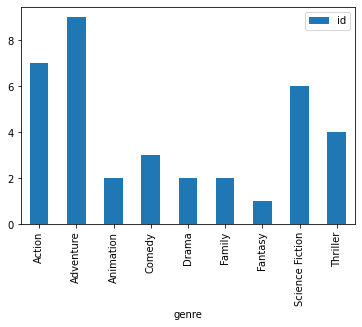

In [23]:
genres_movies = movie_to_genres.merge(pop_movies, left_on="movie_id", right_on="id", how="right")

genre_count = genres_movies.groupby("genre").agg({'id':'count'})

genre_count.plot(kind='bar')
plt.show()

## Using outer join to select actors
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: *Iron Man 1* and *Iron Man 2*. Most of the actors played in both movies. Use an outer join to find actors who **did not** act in both movies.

The *Iron Man 1* table is called **iron_1_actors**, and Iron Man 2 table is called **iron_2_actors**. Both tables have been loaded for you and a few rows printed so you can see the structure.

Venn graph with no overlap

### Instructions

- Save to **iron_1_and_2** the merge of **iron_1_actors** **(left)** with **iron_2_actors** tables with an *outer* join on the **id** column, and set suffixes to **('_1','_2')**.
- Create an index that returns **True** if **name_1** or **name_2** are **null**, and **False** otherwise.

In [24]:
iron_1_actors = pd.read_csv('iron_1_actors.csv',encoding='latin-1')
iron_2_actors = pd.read_csv('iron_2_actors.csv',encoding='latin-1')


In [25]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on='id',
                                     how='outer',
                                     suffixes=('_1','_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | (iron_1_and_2['name_2'].isnull()))


# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                   character_1      id           name_1 character_2 name_2
0                       Yinsen   17857       Shaun Toub         NaN    NaN
2  Obadiah Stane / Iron Monger    1229     Jeff Bridges         NaN    NaN
3                  War Machine   18288  Terrence Howard         NaN    NaN
5                         Raza   57452      Faran Tahir         NaN    NaN
8                   Abu Bakaar  173810    Sayed Badreya         NaN    NaN



## Self join
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called **crews**, which has columns **id**, **job**, and **name**. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

The **crews** table has been loaded for you.

### Instructions

- To a variable called **crews_self_merged**, merge the crews table to itself on the **id** column using an **inner** join, setting the suffixes to **'_dir'** and **'_crew'** for the left and *right* tables respectively.
- Create a Boolean index, named **boolean_filter**, that selects rows from the left table with the job of **'Director'** and avoids rows with the *job of* **'Director'** in the right table.
- Use the **.head()** method to print the first few rows of **direct_crews**.

In [26]:
crews = pd.read_pickle('crews.p')

In [27]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner', suffixes=('_dir','_crew'))

# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == "Director") & \
     (crews_self_merged['job_crew'] != "Director"))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


## Index merge for movie ratings
To practice merging on indexes, you will merge movies and a table called ratings that holds info about movie ratings. Make sure your merge returns all of the rows from the movies table and not all the rows of ratings table need to be included in the result.

The **movies** and **ratings** tables have been loaded for you.

### Instructions

- Merge **movies** and **ratings** on the index and save to a variable called **movies_ratings**, ensuring that all of the rows from the **movies** table are returned.

In [28]:
ratings = pd.read_pickle('ratings.p')
ratings.head()

,id,vote_average,vote_count
0,19995,7.2,11800.0
1,285,6.9,4500.0
2,206647,6.3,4466.0
3,49026,7.6,9106.0
4,49529,6.1,2124.0


In [29]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on='id', how='left')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


## Do sequels earn more?
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

The **sequels** and **financials** tables have been provided.

### Instructions

- With the **sequels** table on the left, merge to it the **financials** table on index named **id**, ensuring that all the rows from the **sequels** are returned and some rows from the other table may not be returned, Save the results to **sequels_fin**.
- Merge the **sequels_fin** table to itself with an **inner** join, where the *left and right* tables merge on **sequel** and **id** respectively with suffixes equal to (**'_org','_seq')**, saving to **orig_seq**.
- Select the **title_org**, **title_seq**, and **diff** columns of **orig_seq** and save this as **titles_diff**.
- Sort by **titles_diff** by **diff** in **descending** order and print the first few rows.

In [30]:
sequels = pd.read_pickle('sequels.p')
financials = pd.read_pickle('financials.p')
sequels['id'] = sequels['id'].astype('str')
financials['id'] = financials['id'].astype('str')
sequels['sequel'] = sequels['sequel'].astype('str')
sequels = sequels.set_index('id')
financials = financials.set_index('id')

In [31]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel',\
    right_on='id', right_index=True,suffixes=('_org','_seq'))

orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[["title_org",'title_seq','diff']]

print(titles_diff.sort_values('diff', ascending=False).head())

               title_org        title_seq          diff
id                                                     
331    Jurassic Park III   Jurassic World  1.144748e+09
272        Batman Begins  The Dark Knight  6.303398e+08
10138         Iron Man 2       Iron Man 3  5.915067e+08
863          Toy Story 2      Toy Story 3  5.696028e+08
10764  Quantum of Solace          Skyfall  5.224703e+08


In [32]:
titles_diff

,title_org,title_seq,diff
id,,,
862,Toy Story,Toy Story 2,123812836.0
863,Toy Story 2,Toy Story 3,569602834.0
675,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince,-4253541.0
121,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King,192601579.0
120,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers,54919036.0
...,...,...,...
76,Before Sunrise,Before Sunset,10457210.0
2292,Clerks,Clerks II,23737246.0
9367,El Mariachi,Desperado,23364525.0


## Performing an anti-join
In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti-join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

The **top_cust** and **employees** tables have been provided for you.

### Instructions

- Merge **employees** and **top_cust** with a left join, setting **indicator** argument to **True**. Save the result to **empl_cust**.
- Select the srid column of **empl_cust** and the rows where **_merge** is '**left_only**'. Save the result to **srid_list**.
- Subset the employees table and select those rows where the srid is in the variable **srid_list** and print the results.

In [37]:
employees = pd.read_csv('employees.csv')
top_cust = pd.read_csv('top_cust.csv', encoding='latin' )

In [48]:
empl_cust = employees.merge(top_cust, on='srid', how='left', indicator=True)

srid_list = empl_cust.loc[empl_cust['_merge'] == "left_only" , 'srid']

print(employees[employees['srid'].isin(srid_list)])

   srid     lname    fname            title   hire_date  \
0     1     Adams   Andrew  General Manager   8/14/2002   
1     2   Edwards    Nancy    Sales Manager    5/1/2002   
5     6  Mitchell  Michael       IT Manager  10/17/2003   
6     7      King   Robert         IT Staff    1/2/2004   
7     8  Callahan    Laura         IT Staff    3/4/2004   

                     email  
0   andrew@chinookcorp.com  
1    nancy@chinookcorp.com  
5  michael@chinookcorp.com  
6   robert@chinookcorp.com  
7    laura@chinookcorp.com  


## Performing a semi-join
Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi-join to find the top revenue-generating non-musical tracks..

The tables non_mus_tcks, top_invoices, and genres have been loaded for you.

### Instructions

- Merge **non_mus_tcks** and **top_invoices** on **tid** using an inner join. Save the result as **tracks_invoices**.
- Use **.isin()** to subset the rows of **non_mus_tck** where **tid** is in the **tid** column of **tracks_invoices**. Save the result as **top_tracks**.
- Group **top_tracks** by **gid** and count the **tid** rows. Save the result to **cnt_by_gid**.
- Merge **cnt_by_gid** with the **genres** table on **gid** and print the result.